# train_target_data

In [1]:
# target train data
import pandas as pd
import numpy as np

target_data = pd.read_csv('target_train.csv')
target_data.head()

,id,therapy_id,therapy_start_date,therapy_end_date,tgt_ade_dc_ind,race_cd,est_age,sex_cd,cms_disabled_ind,cms_low_income_ind
0,1005597228,1005597228-TAGRISSO-1,2020-03-11T00:00:00.000+0000,2020-09-07,0,1.0,NaN,NaN,NaN,NaN
1,1005964858,1005964858-TAGRISSO-1,2021-08-23T00:00:00.000+0000,2021-09-22,1,1.0,86.0,M,0.0,0.0
2,1007548572,1007548572-TAGRISSO-1,2022-01-17T00:00:00.000+0000,2022-07-16,0,1.0,79.0,F,0.0,1.0
3,1009508044,1009508044-TAGRISSO-1,2020-01-23T00:00:00.000+0000,2020-07-21,0,1.0,70.0,F,1.0,1.0
4,1028064791,1028064791-TAGRISSO-1,2021-02-23T00:00:00.000+0000,2021-08-22,0,2.0,74.0,F,1.0,1.0


In [2]:
# convert date columns to datetime objects and set a common timezone (UTC)
target_data['therapy_start_date'] = pd.to_datetime(target_data['therapy_start_date']).dt.tz_localize(None)
target_data['therapy_end_date'] = pd.to_datetime(target_data['therapy_end_date']).dt.tz_localize(None)

# calculate duration of therapy in days
target_data['therapy_duration_days'] = (target_data['therapy_end_date'] - target_data['therapy_start_date']).dt.days
target_data.head()

,id,therapy_id,therapy_start_date,therapy_end_date,tgt_ade_dc_ind,race_cd,est_age,sex_cd,cms_disabled_ind,cms_low_income_ind,therapy_duration_days
0,1005597228,1005597228-TAGRISSO-1,2020-03-11,2020-09-07,0,1.0,NaN,NaN,NaN,NaN,180
1,1005964858,1005964858-TAGRISSO-1,2021-08-23,2021-09-22,1,1.0,86.0,M,0.0,0.0,30
2,1007548572,1007548572-TAGRISSO-1,2022-01-17,2022-07-16,0,1.0,79.0,F,0.0,1.0,180
3,1009508044,1009508044-TAGRISSO-1,2020-01-23,2020-07-21,0,1.0,70.0,F,1.0,1.0,180
4,1028064791,1028064791-TAGRISSO-1,2021-02-23,2021-08-22,0,2.0,74.0,F,1.0,1.0,180


# train_rx_claims_data

In [3]:
# rxclaims train data
rxclaims_data = pd.read_csv('rxclms_train.csv')
rxclaims_data.head()

,therapy_id,document_key,ndc_id,service_date,process_date,pay_day_supply_cnt,rx_cost,tot_drug_cost_accum_amt,reversal_ind,mail_order_ind,...,hum_drug_class_desc,strength_meas,metric_strength,specialty_ind,clm_type,ddi_ind,anticoag_ind,diarrhea_treat_ind,nausea_treat_ind,seizure_treat_ind
0,1009508044-TAGRISSO-1,A184611654291011,169266015,2018-03-02T00:00:00.000Z,2019-12-04T00:00:00.000Z,30,919.78,2830.22,N,N,...,DIABETES,UNIT/ML,100.0,NONSPCL,rx,0,0,0,0,0
1,1023838279-TAGRISSO-1,A184877988141011,69097022416,2018-03-28T00:00:00.000Z,2020-03-13T00:00:00.000Z,28,5.00,1138.66,N,N,...,OSTEOPOROSIS,MG,70.0,NONSPCL,rx,0,0,0,0,0
2,1023838279-TAGRISSO-1,A185952462961011,60505257908,2018-07-14T00:00:00.000Z,2020-03-13T00:00:00.000Z,30,7.30,2693.11,N,N,...,CHOLESTEROL,MG,20.0,NONSPCL,rx,0,0,0,0,0
3,1023838279-TAGRISSO-1,A186219930881011,65862057290,2018-08-09T00:00:00.000Z,2020-03-17T00:00:00.000Z,30,12.20,2718.31,N,N,...,CARDIOLOGY - HYPERTENSION AGENTS,MG,160.0,NONSPCL,rx,0,0,0,0,0
4,1071647492-TAGRISSO-1,A194013465121011,16252060144,2019-01-01T00:00:00.000Z,2020-03-03T00:00:00.000Z,90,9.90,0.00,N,Y,...,OSTEOPOROSIS,MG,70.0,NONSPCL,rx,0,0,0,0,0


In [4]:
# bring in therapy duration info
m_rxclaims = pd.merge(rxclaims_data, target_data[['therapy_id', 'therapy_start_date', 'therapy_end_date', 'therapy_duration_days']], on='therapy_id', how='left')
m_rxclaims.tail()

,therapy_id,document_key,ndc_id,service_date,process_date,pay_day_supply_cnt,rx_cost,tot_drug_cost_accum_amt,reversal_ind,mail_order_ind,...,specialty_ind,clm_type,ddi_ind,anticoag_ind,diarrhea_treat_ind,nausea_treat_ind,seizure_treat_ind,therapy_start_date,therapy_end_date,therapy_duration_days
32128,1013396924-TAGRISSO-1,M507381525551001,43547027509,2020-12-03T00:00:00.000Z,2020-12-04T00:00:00.000Z,30,5.20,22.60,N,N,...,NONSPCL,rx,0,0,0,0,0,2020-12-18,2021-01-17,30
32129,1050705030-TAGRISSO-1,M517443068761011,61314054701,2021-12-10T00:00:00.000Z,2021-12-28T00:00:00.000Z,90,24.59,14676.67,N,Y,...,NONSPCL,rx,0,0,0,0,0,2021-11-30,2022-01-29,60
32130,1120826442-TAGRISSO-1,M524312133731011,51672130100,2022-01-31T00:00:00.000Z,2022-02-22T00:00:00.000Z,30,35.15,14756.31,N,N,...,NONSPCL,rx,0,0,0,0,0,2022-01-24,2022-06-24,151
32131,1121652095-TAGRISSO-1,M524683055321011,2823305,2022-03-09T00:00:00.000Z,2022-03-23T00:00:00.000Z,26,155.64,1493.13,N,N,...,NONSPCL,rx,0,0,0,0,0,2022-06-08,2022-07-08,30
32132,1123139543-TAGRISSO-1,M525873683581011,29300039805,2022-07-06T00:00:00.000Z,2022-08-03T00:00:00.000Z,90,3.20,0.00,N,Y,...,NONSPCL,rx,0,0,0,0,0,2022-06-10,2022-08-13,64


In [5]:
# convert 'service_date' to datetime and convert to the timezone of 'therapy_start_date'
m_rxclaims['service_date'] = pd.to_datetime(m_rxclaims['service_date']).dt.tz_localize(None)

# create a new column 'therapy_status' based on conditions
m_rxclaims['rx_status'] = 'during_therapy'  # default to during_therapy
m_rxclaims.loc[m_rxclaims['service_date'] < m_rxclaims['therapy_start_date'], 'rx_status'] = 'before_therapy'
m_rxclaims.loc[m_rxclaims['service_date'] > m_rxclaims['therapy_end_date'], 'rx_status'] = 'after_therapy'

m_rxclaims.tail()

,therapy_id,document_key,ndc_id,service_date,process_date,pay_day_supply_cnt,rx_cost,tot_drug_cost_accum_amt,reversal_ind,mail_order_ind,...,clm_type,ddi_ind,anticoag_ind,diarrhea_treat_ind,nausea_treat_ind,seizure_treat_ind,therapy_start_date,therapy_end_date,therapy_duration_days,rx_status
32128,1013396924-TAGRISSO-1,M507381525551001,43547027509,2020-12-03,2020-12-04T00:00:00.000Z,30,5.20,22.60,N,N,...,rx,0,0,0,0,0,2020-12-18,2021-01-17,30,before_therapy
32129,1050705030-TAGRISSO-1,M517443068761011,61314054701,2021-12-10,2021-12-28T00:00:00.000Z,90,24.59,14676.67,N,Y,...,rx,0,0,0,0,0,2021-11-30,2022-01-29,60,during_therapy
32130,1120826442-TAGRISSO-1,M524312133731011,51672130100,2022-01-31,2022-02-22T00:00:00.000Z,30,35.15,14756.31,N,N,...,rx,0,0,0,0,0,2022-01-24,2022-06-24,151,during_therapy
32131,1121652095-TAGRISSO-1,M524683055321011,2823305,2022-03-09,2022-03-23T00:00:00.000Z,26,155.64,1493.13,N,N,...,rx,0,0,0,0,0,2022-06-08,2022-07-08,30,before_therapy
32132,1123139543-TAGRISSO-1,M525873683581011,29300039805,2022-07-06,2022-08-03T00:00:00.000Z,90,3.20,0.00,N,Y,...,rx,0,0,0,0,0,2022-06-10,2022-08-13,64,during_therapy


In [6]:
relevant_columns = [
    'therapy_id', 'therapy_duration_days', 'rx_status', 'rx_cost', 'ddi_ind', 'anticoag_ind', 'diarrhea_treat_ind', 
    'nausea_treat_ind', 'seizure_treat_ind']

# dropping all other columns
columns_to_drop = [col for col in m_rxclaims.columns if col not in relevant_columns]
m_rxclaims = m_rxclaims.drop(columns=columns_to_drop)
# m_rxclaims[relevant_columns]

m_rxclaims.tail()

,therapy_id,rx_cost,ddi_ind,anticoag_ind,diarrhea_treat_ind,nausea_treat_ind,seizure_treat_ind,therapy_duration_days,rx_status
32128,1013396924-TAGRISSO-1,5.20,0,0,0,0,0,30,before_therapy
32129,1050705030-TAGRISSO-1,24.59,0,0,0,0,0,60,during_therapy
32130,1120826442-TAGRISSO-1,35.15,0,0,0,0,0,151,during_therapy
32131,1121652095-TAGRISSO-1,155.64,0,0,0,0,0,30,before_therapy
32132,1123139543-TAGRISSO-1,3.20,0,0,0,0,0,64,during_therapy


In [7]:
# pivot to have separate columns for before, during, and after therapy
pivot_rxclaims = m_rxclaims.pivot_table(index='therapy_id',
                                        columns='rx_status',
                                        values=['rx_cost', 'ddi_ind', 'anticoag_ind', 'diarrhea_treat_ind', 'nausea_treat_ind', 
                                                'seizure_treat_ind'],
                                        aggfunc='sum',
                                        fill_value=0)

# flatten the multiIndex columns and reset the index
pivot_rxclaims.columns = ['_'.join(col) for col in pivot_rxclaims.columns]
pivot_rxclaims.reset_index(inplace=True)

m_rxclaims_unique=m_rxclaims[['therapy_id','therapy_duration_days']]
m_rxclaims_unique = m_rxclaims_unique.drop_duplicates(subset='therapy_id')

pivot_rxclaims = pd.merge(pivot_rxclaims, m_rxclaims_unique, on='therapy_id', how='left')
pivot_rxclaims.tail(50)

,therapy_id,anticoag_ind_before_therapy,anticoag_ind_during_therapy,ddi_ind_before_therapy,ddi_ind_during_therapy,diarrhea_treat_ind_before_therapy,diarrhea_treat_ind_during_therapy,nausea_treat_ind_before_therapy,nausea_treat_ind_during_therapy,rx_cost_before_therapy,rx_cost_during_therapy,seizure_treat_ind_before_therapy,seizure_treat_ind_during_therapy,therapy_duration_days
1110,1118371882-TAGRISSO-1,1,1,0,0,0,0,6,4,577.17,76363.19,0,0,180
1111,1118371981-TAGRISSO-1,1,3,0,0,0,0,0,0,534.62,69054.82,0,0,133
1112,1118411541-TAGRISSO-1,0,0,0,0,0,1,0,3,17.10,116495.25,0,0,180
1113,1118420476-TAGRISSO-1,0,0,0,0,0,0,0,0,0.00,14676.17,0,0,30
1114,1118534263-TAGRISSO-1,0,5,0,0,0,1,0,1,0.00,118912.43,0,0,180
1115,1118583241-TAGRISSO-1,0,0,0,0,0,0,0,0,3.00,130216.13,0,0,180
1116,1118620189-TAGRISSO-1,0,0,0,0,0,0,0,0,0.00,44090.38,0,0,90
1117,1118629867-TAGRISSO-1,0,0,0,1,0,0,0,1,1881.51,46013.18,0,0,90
1118,1118630665-TAGRISSO-1,0,0,0,0,0,0,0,1,166.80,104971.82,0,0,180
1119,1118641161-TAGRISSO-1,0,0,0,0,0,0,0,0,0.00,82831.13,0,0,150


In [8]:
# create a new column for the sum of 'before' indicators
pivot_rxclaims['before_indicators_sum'] = pivot_rxclaims['anticoag_ind_before_therapy'] + pivot_rxclaims['ddi_ind_before_therapy'] + pivot_rxclaims['diarrhea_treat_ind_before_therapy'] + pivot_rxclaims['nausea_treat_ind_before_therapy'] + pivot_rxclaims['seizure_treat_ind_before_therapy']

# create a new column for the sum of 'during' indicators
pivot_rxclaims['during_indicators_sum'] = pivot_rxclaims['anticoag_ind_during_therapy'] + pivot_rxclaims['ddi_ind_during_therapy'] + pivot_rxclaims['diarrhea_treat_ind_during_therapy'] + pivot_rxclaims['nausea_treat_ind_during_therapy'] + pivot_rxclaims['seizure_treat_ind_during_therapy']

pivot_rxclaims.head()

,therapy_id,anticoag_ind_before_therapy,anticoag_ind_during_therapy,ddi_ind_before_therapy,ddi_ind_during_therapy,diarrhea_treat_ind_before_therapy,diarrhea_treat_ind_during_therapy,nausea_treat_ind_before_therapy,nausea_treat_ind_during_therapy,rx_cost_before_therapy,rx_cost_during_therapy,seizure_treat_ind_before_therapy,seizure_treat_ind_during_therapy,therapy_duration_days,before_indicators_sum,during_indicators_sum
0,1000110916-TAGRISSO-1,2,1,0,0,0,0,0,0,4720.67,48934.80,0,0,90,2,1
1,1000207687-TAGRISSO-1,1,0,1,1,0,0,0,0,1643.78,15777.57,0,0,30,2,1
2,1000260673-TAGRISSO-1,0,0,2,1,0,0,0,1,39.74,67710.23,0,0,120,2,2
3,1000389557-TAGRISSO-1,0,0,0,0,0,0,2,0,97.18,114903.95,0,0,180,2,0
4,1000767323-TAGRISSO-1,0,0,0,0,0,0,0,0,41.32,48875.95,0,0,90,0,0


In [9]:
# create a new column 'side_effects_during_therapy_flag'
pivot_rxclaims['first_side_effects_during_therapy_flag'] = (pivot_rxclaims['before_indicators_sum'] == 0) & (pivot_rxclaims['during_indicators_sum'] >= 1)

# convert boolean T/F values to 1 or 0
pivot_rxclaims['first_side_effects_during_therapy_flag'] = pivot_rxclaims['first_side_effects_during_therapy_flag'].astype(int)

pivot_rxclaims.tail(20)

,therapy_id,anticoag_ind_before_therapy,anticoag_ind_during_therapy,ddi_ind_before_therapy,ddi_ind_during_therapy,diarrhea_treat_ind_before_therapy,diarrhea_treat_ind_during_therapy,nausea_treat_ind_before_therapy,nausea_treat_ind_during_therapy,rx_cost_before_therapy,rx_cost_during_therapy,seizure_treat_ind_before_therapy,seizure_treat_ind_during_therapy,therapy_duration_days,before_indicators_sum,during_indicators_sum,first_side_effects_during_therapy_flag
1140,1120930036-TAGRISSO-1,0,0,0,0,0,0,0,0,0.00,61862.15,0,0,180,0,0,0
1141,1120953038-TAGRISSO-1,0,2,0,0,0,0,0,0,0.00,15236.26,0,0,30,0,2,1
1142,1121093945-TAGRISSO-1,0,0,1,2,0,0,0,1,48.40,103052.06,0,0,180,1,3,0
1143,1121207993-TAGRISSO-1,2,2,1,0,0,0,0,0,4641.53,36076.37,1,2,60,4,4,0
1144,1121210255-TAGRISSO-1,0,0,0,0,0,0,0,0,0.00,101182.72,0,0,180,0,0,0
1145,1121652095-TAGRISSO-1,0,0,0,0,0,0,2,0,5833.49,15692.68,0,0,30,2,0,0
1146,1121737524-TAGRISSO-1,0,1,0,0,0,0,0,0,0.00,67150.93,0,0,180,0,1,1
1147,1121906962-TAGRISSO-1,0,0,0,0,0,0,0,0,159.21,117548.48,0,0,180,0,0,0
1148,1121940063-TAGRISSO-1,0,0,0,0,0,0,0,0,0.00,17101.11,0,0,30,0,0,0
1149,1121951424-TAGRISSO-1,0,0,0,0,0,0,0,0,0.00,115147.95,0,0,180,0,0,0


In [10]:
# calculate the ratio of 'during_indicators_sum' divided by 'therapy_duration'
pivot_rxclaims['before_indicators_ratio'] = pivot_rxclaims['before_indicators_sum'] / 90
pivot_rxclaims['during_indicators_ratio'] = pivot_rxclaims['during_indicators_sum'] / pivot_rxclaims['therapy_duration_days']

# calculate 'rx_cost_during_therapy' divided by 'therapy_duration'
pivot_rxclaims['rx_cost_during_therapy_per_day'] = pivot_rxclaims['rx_cost_during_therapy'] / pivot_rxclaims['therapy_duration_days']

pivot_rxclaims.head()

,therapy_id,anticoag_ind_before_therapy,anticoag_ind_during_therapy,ddi_ind_before_therapy,ddi_ind_during_therapy,diarrhea_treat_ind_before_therapy,diarrhea_treat_ind_during_therapy,nausea_treat_ind_before_therapy,nausea_treat_ind_during_therapy,rx_cost_before_therapy,rx_cost_during_therapy,seizure_treat_ind_before_therapy,seizure_treat_ind_during_therapy,therapy_duration_days,before_indicators_sum,during_indicators_sum,first_side_effects_during_therapy_flag,before_indicators_ratio,during_indicators_ratio,rx_cost_during_therapy_per_day
0,1000110916-TAGRISSO-1,2,1,0,0,0,0,0,0,4720.67,48934.80,0,0,90,2,1,0,0.022222,0.011111,543.720000
1,1000207687-TAGRISSO-1,1,0,1,1,0,0,0,0,1643.78,15777.57,0,0,30,2,1,0,0.022222,0.033333,525.919000
2,1000260673-TAGRISSO-1,0,0,2,1,0,0,0,1,39.74,67710.23,0,0,120,2,2,0,0.022222,0.016667,564.251917
3,1000389557-TAGRISSO-1,0,0,0,0,0,0,2,0,97.18,114903.95,0,0,180,2,0,0,0.022222,0.000000,638.355278
4,1000767323-TAGRISSO-1,0,0,0,0,0,0,0,0,41.32,48875.95,0,0,90,0,0,0,0.000000,0.000000,543.066111


# train_med_claims_data

In [11]:
# medclaims train data
medclaims_data = pd.read_csv('medclms_train.csv')

medclaims_data.head()

,therapy_id,medclm_key,clm_unique_key,primary_diag_cd,visit_date,diag_cd2,diag_cd3,diag_cd4,diag_cd5,diag_cd6,...,hedis_pot,clm_type,ade_diagnosis,seizure_diagnosis,pain_diagnosis,fatigue_diagnosis,nausea_diagnosis,hyperglycemia_diagnosis,constipation_diagnosis,diarrhea_diagnosis
0,1066310426-TAGRISSO-1,35908472910,649143000473431803,I70292,2019-09-10T00:00:00.000Z,I771,I739,R9431,Z7982,Z79899,...,Other,med,0,0,0,0,0,0,0,0
1,1094522162-TAGRISSO-1,37189420103,934834000476811903,J9601,2020-08-21T00:00:00.000Z,J910,NaN,NaN,NaN,NaN,...,Other,med,0,0,0,0,0,0,0,0
2,1104741185-TAGRISSO-1,37128499255,748244100476652103,E785,2020-07-14T00:00:00.000Z,I10,J324,NaN,NaN,NaN,...,Other,med,0,0,0,0,0,0,0,0
3,1012749208-TAGRISSO-1,36269844999,589034000474672103,C3492,2020-02-04T00:00:00.000Z,I825Z9,T83518A,N390,J942,J910,...,Other,med,0,0,0,0,0,0,0,0
4,1000110916-TAGRISSO-1,36448002258,663113000474981803,C3490,2020-03-05T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,...,Outpatient,med,0,0,0,0,0,0,0,0


In [12]:
# merge on 'therapy_id'
m_medclaims = pd.merge(medclaims_data, target_data[['therapy_id', 'therapy_start_date', 'therapy_end_date', 'therapy_duration_days']], on='therapy_id', how='left')
m_medclaims.tail()

,therapy_id,medclm_key,clm_unique_key,primary_diag_cd,visit_date,diag_cd2,diag_cd3,diag_cd4,diag_cd5,diag_cd6,...,seizure_diagnosis,pain_diagnosis,fatigue_diagnosis,nausea_diagnosis,hyperglycemia_diagnosis,constipation_diagnosis,diarrhea_diagnosis,therapy_start_date,therapy_end_date,therapy_duration_days
100154,1012918344-TAGRISSO-1,41412153341,854920100484292603,A419,2022-09-21T00:00:00.000Z,I21A1,Z66,J189,J9601,J9602,...,0,0,0,0,0,0,0,2022-04-19,2022-10-16,180
100155,1101699376-TAGRISSO-1,41025577817,265874000483672003,J90,2022-04-29T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,2022-06-08,2022-12-05,180
100156,1097097741-TAGRISSO-1,41232067211,218405100483981903,J449,2022-08-28T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,2022-04-27,2022-10-24,180
100157,1033423711-TAGRISSO-1,90008439449,90008354718,C3490,2021-11-30T00:00:00.000Z,J910,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,2022-01-12,2022-07-11,180
100158,1101822260-TAGRISSO-1,41508944781,836863100484421803,C3490,2022-10-03T00:00:00.000Z,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,2022-05-10,2022-11-06,180


In [13]:
# convert 'service_date' to datetime and convert to the timezone of 'therapy_start_date'
m_medclaims['visit_date'] = pd.to_datetime(m_medclaims['visit_date']).dt.tz_localize(None)

# create a new column 'therapy_status' based on conditions
m_medclaims['diag_status'] = 'during_therapy'  # default to during_therapy
m_medclaims.loc[m_medclaims['visit_date'] < m_medclaims['therapy_start_date'], 'diag_status'] = 'before_therapy'
m_medclaims.loc[m_medclaims['visit_date'] > m_medclaims['therapy_end_date'], 'diag_status'] = 'after_therapy'

m_medclaims.tail()

,therapy_id,medclm_key,clm_unique_key,primary_diag_cd,visit_date,diag_cd2,diag_cd3,diag_cd4,diag_cd5,diag_cd6,...,pain_diagnosis,fatigue_diagnosis,nausea_diagnosis,hyperglycemia_diagnosis,constipation_diagnosis,diarrhea_diagnosis,therapy_start_date,therapy_end_date,therapy_duration_days,diag_status
100154,1012918344-TAGRISSO-1,41412153341,854920100484292603,A419,2022-09-21,I21A1,Z66,J189,J9601,J9602,...,0,0,0,0,0,0,2022-04-19,2022-10-16,180,during_therapy
100155,1101699376-TAGRISSO-1,41025577817,265874000483672003,J90,2022-04-29,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,2022-06-08,2022-12-05,180,before_therapy
100156,1097097741-TAGRISSO-1,41232067211,218405100483981903,J449,2022-08-28,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,2022-04-27,2022-10-24,180,during_therapy
100157,1033423711-TAGRISSO-1,90008439449,90008354718,C3490,2021-11-30,J910,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,2022-01-12,2022-07-11,180,before_therapy
100158,1101822260-TAGRISSO-1,41508944781,836863100484421803,C3490,2022-10-03,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,2022-05-10,2022-11-06,180,during_therapy


In [14]:
relevant_columns_meds = [
    'therapy_id', 'clm_unique_key', 'ade_diagnosis', 'seizure_diagnosis', 'pain_diagnosis', 'fatigue_diagnosis', 'nausea_diagnosis', 
    'hyperglycemia_diagnosis', 'constipation_diagnosis', 'diarrhea_diagnosis','therapy_duration_days', 'diag_status']

# dropping all other columns
columns_to_drop_med = [col for col in m_medclaims.columns if col not in relevant_columns_meds]

m_medclaims = m_medclaims.drop(columns=columns_to_drop_med)
m_medclaims.tail()

,therapy_id,clm_unique_key,ade_diagnosis,seizure_diagnosis,pain_diagnosis,fatigue_diagnosis,nausea_diagnosis,hyperglycemia_diagnosis,constipation_diagnosis,diarrhea_diagnosis,therapy_duration_days,diag_status
100154,1012918344-TAGRISSO-1,854920100484292603,0,0,0,0,0,0,0,0,180,during_therapy
100155,1101699376-TAGRISSO-1,265874000483672003,0,0,0,0,0,0,0,0,180,before_therapy
100156,1097097741-TAGRISSO-1,218405100483981903,0,0,0,0,0,0,0,0,180,during_therapy
100157,1033423711-TAGRISSO-1,90008354718,0,0,0,0,0,0,0,0,180,before_therapy
100158,1101822260-TAGRISSO-1,836863100484421803,0,0,0,0,0,0,0,0,180,during_therapy


In [15]:
# remove duplicate rows based on both 'therapy_id' and 'clm_unique_key' columns
m_medclaims = m_medclaims.drop_duplicates(subset=['therapy_id', 'clm_unique_key'])
                                                        
m_medclaims.reset_index(drop=True, inplace=True)
m_medclaims.tail()

,therapy_id,clm_unique_key,ade_diagnosis,seizure_diagnosis,pain_diagnosis,fatigue_diagnosis,nausea_diagnosis,hyperglycemia_diagnosis,constipation_diagnosis,diarrhea_diagnosis,therapy_duration_days,diag_status
31738,1011465333-TAGRISSO-1,227016000484471903,0,0,0,0,0,0,0,0,150,during_therapy
31739,1110323049-TAGRISSO-1,481179000483831603,0,0,0,0,0,0,0,0,180,during_therapy
31740,1093486876-TAGRISSO-1,720359100483601903,1,0,0,1,0,0,0,0,180,during_therapy
31741,1113724685-TAGRISSO-1,3700000484053301,0,0,0,0,0,0,0,0,180,during_therapy
31742,1097097741-TAGRISSO-1,218405100483981903,0,0,0,0,0,0,0,0,180,during_therapy


In [16]:
# aggregated_data_med[diagnosis_columns] = aggregated_data_med[diagnosis_columns].map(lambda x: 1 if x != 0 else x)

# pivot to have separate columns for before, during, and after therapy
pivot_medclaims = m_medclaims.pivot_table(index='therapy_id',
                                        columns='diag_status',
                                        values=['ade_diagnosis', 'seizure_diagnosis', 'pain_diagnosis', 'fatigue_diagnosis', 
                                                'nausea_diagnosis', 'hyperglycemia_diagnosis','constipation_diagnosis', 
                                                'diarrhea_diagnosis'],
                                        aggfunc='sum',
                                        fill_value=0)

pivot_medclaims.head()
pivot_medclaims.columns

MultiIndex([(          'ade_diagnosis', 'before_therapy'),
            (          'ade_diagnosis', 'during_therapy'),
            ( 'constipation_diagnosis', 'before_therapy'),
            ( 'constipation_diagnosis', 'during_therapy'),
            (     'diarrhea_diagnosis', 'before_therapy'),
            (     'diarrhea_diagnosis', 'during_therapy'),
            (      'fatigue_diagnosis', 'before_therapy'),
            (      'fatigue_diagnosis', 'during_therapy'),
            ('hyperglycemia_diagnosis', 'before_therapy'),
            ('hyperglycemia_diagnosis', 'during_therapy'),
            (       'nausea_diagnosis', 'before_therapy'),
            (       'nausea_diagnosis', 'during_therapy'),
            (         'pain_diagnosis', 'before_therapy'),
            (         'pain_diagnosis', 'during_therapy'),
            (      'seizure_diagnosis', 'before_therapy'),
            (      'seizure_diagnosis', 'during_therapy')],
           names=[None, 'diag_status'])

In [17]:
# flatten the multiIndex columns and reset the index
pivot_medclaims.columns = ['_'.join(col) for col in pivot_medclaims.columns]
pivot_medclaims.reset_index(inplace=True)

m_medclaims_unique=m_medclaims[['therapy_id','therapy_duration_days']]
m_medclaims_unique = m_medclaims_unique.drop_duplicates(subset='therapy_id')

pivot_medclaims = pd.merge(pivot_medclaims, m_medclaims_unique, on='therapy_id', how='left')

pivot_medclaims.tail()

# pivot_medclaims.to_csv("pivoted_medclaims.csv")

,therapy_id,ade_diagnosis_before_therapy,ade_diagnosis_during_therapy,constipation_diagnosis_before_therapy,constipation_diagnosis_during_therapy,diarrhea_diagnosis_before_therapy,diarrhea_diagnosis_during_therapy,fatigue_diagnosis_before_therapy,fatigue_diagnosis_during_therapy,hyperglycemia_diagnosis_before_therapy,hyperglycemia_diagnosis_during_therapy,nausea_diagnosis_before_therapy,nausea_diagnosis_during_therapy,pain_diagnosis_before_therapy,pain_diagnosis_during_therapy,seizure_diagnosis_before_therapy,seizure_diagnosis_during_therapy,therapy_duration_days
531,1121093945-TAGRISSO-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,180
532,1121210255-TAGRISSO-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,180
533,1121906962-TAGRISSO-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,180
534,1121951424-TAGRISSO-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,180
535,1122173495-TAGRISSO-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,180


In [18]:
# create a new column for the sum of 'before' diagnosis indicators
pivot_medclaims['before_diagnosis_sum'] = (
    pivot_medclaims['constipation_diagnosis_before_therapy'] +
    pivot_medclaims['diarrhea_diagnosis_before_therapy'] +
    pivot_medclaims['fatigue_diagnosis_before_therapy'] +
    pivot_medclaims['hyperglycemia_diagnosis_before_therapy'] +
    pivot_medclaims['nausea_diagnosis_before_therapy'] +
    pivot_medclaims['pain_diagnosis_before_therapy'] +
    pivot_medclaims['seizure_diagnosis_before_therapy']
)

# create a new column for the sum of 'during' diagnosis indicators
pivot_medclaims['during_diagnosis_sum'] = (
    pivot_medclaims['constipation_diagnosis_during_therapy'] +
    pivot_medclaims['diarrhea_diagnosis_during_therapy'] +
    pivot_medclaims['fatigue_diagnosis_during_therapy'] +
    pivot_medclaims['hyperglycemia_diagnosis_during_therapy'] +
    pivot_medclaims['nausea_diagnosis_during_therapy'] +
    pivot_medclaims['pain_diagnosis_during_therapy'] +
    pivot_medclaims['seizure_diagnosis_during_therapy']
)

pivot_medclaims.head()

,therapy_id,ade_diagnosis_before_therapy,ade_diagnosis_during_therapy,constipation_diagnosis_before_therapy,constipation_diagnosis_during_therapy,diarrhea_diagnosis_before_therapy,diarrhea_diagnosis_during_therapy,fatigue_diagnosis_before_therapy,fatigue_diagnosis_during_therapy,hyperglycemia_diagnosis_before_therapy,hyperglycemia_diagnosis_during_therapy,nausea_diagnosis_before_therapy,nausea_diagnosis_during_therapy,pain_diagnosis_before_therapy,pain_diagnosis_during_therapy,seizure_diagnosis_before_therapy,seizure_diagnosis_during_therapy,therapy_duration_days,before_diagnosis_sum,during_diagnosis_sum
0,1000110916-TAGRISSO-1,1,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,90,2,1
1,1000207687-TAGRISSO-1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,1,0
2,1000260673-TAGRISSO-1,3,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,120,3,0
3,1000767323-TAGRISSO-1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,90,1,0
4,1000767683-TAGRISSO-1,8,2,0,0,0,0,0,1,0,0,8,1,0,0,0,0,30,8,2


In [19]:
# create a new column 'side_effects_during_therapy_flag'
pivot_medclaims['first_diagnosis_during_therapy_flag'] = (pivot_medclaims['before_diagnosis_sum'] == 0) & (pivot_medclaims['during_diagnosis_sum'] >= 1)

# convert boolean values to 1 or 0
pivot_medclaims['first_diagnosis_during_therapy_flag'] = pivot_medclaims['first_diagnosis_during_therapy_flag'].astype(int)

pivot_medclaims.tail(20)

,therapy_id,ade_diagnosis_before_therapy,ade_diagnosis_during_therapy,constipation_diagnosis_before_therapy,constipation_diagnosis_during_therapy,diarrhea_diagnosis_before_therapy,diarrhea_diagnosis_during_therapy,fatigue_diagnosis_before_therapy,fatigue_diagnosis_during_therapy,hyperglycemia_diagnosis_before_therapy,...,nausea_diagnosis_before_therapy,nausea_diagnosis_during_therapy,pain_diagnosis_before_therapy,pain_diagnosis_during_therapy,seizure_diagnosis_before_therapy,seizure_diagnosis_during_therapy,therapy_duration_days,before_diagnosis_sum,during_diagnosis_sum,first_diagnosis_during_therapy_flag
516,1116460641-TAGRISSO-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,180,0,0,0
517,1116602317-TAGRISSO-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,60,0,0,0
518,1116787788-TAGRISSO-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,103,0,0,0
519,1117265720-TAGRISSO-1,0,9,0,1,0,0,0,8,0,...,0,0,0,0,0,0,180,0,9,1
520,1118097261-TAGRISSO-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,30,0,0,0
521,1118113212-TAGRISSO-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,180,0,0,0
522,1118210589-TAGRISSO-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,180,0,0,0
523,1118351169-TAGRISSO-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,30,0,0,0
524,1118371981-TAGRISSO-1,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,133,0,1,1
525,1118411541-TAGRISSO-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,180,0,0,0


In [20]:
# calculate the ratio of 'during_indicators_sum' divided by 'therapy_duration'
pivot_medclaims['before_diagnosis_ratio'] = pivot_medclaims['before_diagnosis_sum'] / 90
pivot_medclaims['during_diagnosis_ratio'] = pivot_medclaims['during_diagnosis_sum'] / pivot_medclaims['therapy_duration_days']
pivot_medclaims.head()

,therapy_id,ade_diagnosis_before_therapy,ade_diagnosis_during_therapy,constipation_diagnosis_before_therapy,constipation_diagnosis_during_therapy,diarrhea_diagnosis_before_therapy,diarrhea_diagnosis_during_therapy,fatigue_diagnosis_before_therapy,fatigue_diagnosis_during_therapy,hyperglycemia_diagnosis_before_therapy,...,pain_diagnosis_before_therapy,pain_diagnosis_during_therapy,seizure_diagnosis_before_therapy,seizure_diagnosis_during_therapy,therapy_duration_days,before_diagnosis_sum,during_diagnosis_sum,first_diagnosis_during_therapy_flag,before_diagnosis_ratio,during_diagnosis_ratio
0,1000110916-TAGRISSO-1,1,1,0,1,1,0,0,0,0,...,0,0,0,0,90,2,1,0,0.022222,0.011111
1,1000207687-TAGRISSO-1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,30,1,0,0,0.011111,0.000000
2,1000260673-TAGRISSO-1,3,0,0,0,0,0,0,0,0,...,3,0,0,0,120,3,0,0,0.033333,0.000000
3,1000767323-TAGRISSO-1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,90,1,0,0,0.011111,0.000000
4,1000767683-TAGRISSO-1,8,2,0,0,0,0,0,1,0,...,0,0,0,0,30,8,2,0,0.088889,0.066667


# merging_all_train_datasets

In [21]:
# merging all datasets
pre_merged_data = pd.merge(pivot_rxclaims, target_data, on='therapy_id', how='outer')  
merged_data = pd.merge(pre_merged_data, pivot_medclaims, on='therapy_id', how='outer') 
merged_data.head()

# merged_data.to_csv("test.csv", index=False)

,therapy_id,anticoag_ind_before_therapy,anticoag_ind_during_therapy,ddi_ind_before_therapy,ddi_ind_during_therapy,diarrhea_treat_ind_before_therapy,diarrhea_treat_ind_during_therapy,nausea_treat_ind_before_therapy,nausea_treat_ind_during_therapy,rx_cost_before_therapy,...,pain_diagnosis_before_therapy,pain_diagnosis_during_therapy,seizure_diagnosis_before_therapy,seizure_diagnosis_during_therapy,therapy_duration_days,before_diagnosis_sum,during_diagnosis_sum,first_diagnosis_during_therapy_flag,before_diagnosis_ratio,during_diagnosis_ratio
0,1000110916-TAGRISSO-1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4720.67,...,0.0,0.0,0.0,0.0,90.0,2.0,1.0,0.0,0.022222,0.011111
1,1000207687-TAGRISSO-1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1643.78,...,0.0,0.0,0.0,0.0,30.0,1.0,0.0,0.0,0.011111,0.000000
2,1000260673-TAGRISSO-1,0.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,39.74,...,3.0,0.0,0.0,0.0,120.0,3.0,0.0,0.0,0.033333,0.000000
3,1000389557-TAGRISSO-1,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,97.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000767323-TAGRISSO-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.32,...,0.0,0.0,0.0,0.0,90.0,1.0,0.0,0.0,0.011111,0.000000


In [22]:
# # count the number of 'F' and 'M' values in the available data
# num_females = (merged_data['sex_cd'] == 1).sum()
# num_males = (merged_data['sex_cd'] == 0).sum()

# # calculate the ratio of 'F' and 'M' in the available data
# ratio_females = num_females / (num_females + num_males)
# ratio_males = num_males / (num_females + num_males)

# # replace missing values with 1 or 0 based on the calculated distribution
# missing_sex_cd_indices = merged_data['sex_cd'].isnull()
# missing_sex_cd_values = np.random.choice([1, 0], size=missing_sex_cd_indices.sum(), p=[ratio_females, ratio_males])

# # update the 'sex_cd' column with the assigned values for missing rows
# merged_data.loc[missing_sex_cd_indices, 'sex_cd'] = missing_sex_cd_values

# # replacing missing values in 'est_age' with median
# median_age = merged_data['est_age'].median()
# merged_data['est_age'].fillna(median_age, inplace=True)

# # replace nan with 0
# merged_data.fillna(0, inplace=True)

# # merged_data.to_csv("test.csv", index=False)
# merged_data.head()

In [23]:
# import pandas as pd
# import numpy as np
# from xgboost import XGBRegressor
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # Load the red wine dataset
# data = pd.read_csv("winequality-red.csv")

# # Split the data into features and target
# X = data.drop(columns=["quality"])
# y = data["quality"]

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

# # Fit an XGBoost model to the training data
# xgb_model = XGBRegressor(random_state=42)
# xgb_model.fit(X_train, y_train)

# # Make predictions on the validation set
# xgb_predictions = xgb_model.predict(X_val)

# # Calculate the root mean squared error of the model on the validation set
# xgb_rmse = np.sqrt(mean_squared_error(y_val, xgb_predictions))

# # Print the root mean squared error of the model on the validation set
# print("RMSE of XGBoost model without scaling:", xgb_rmse)

# # Scale the data using StandardScaler
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

# # Fit an XGBoost model to the scaled training data
# xgb_model_scaled = XGBRegressor(random_state=42)
# xgb_model_scaled.fit(X_train_scaled, y_train)

# # Make predictions on the scaled validation set
# xgb_predictions_scaled = xgb_model_scaled.predict(X_val_scaled)

# # Calculate the root mean squared error of the model on the scaled validation set
# xgb_rmse_scaled = np.sqrt(mean_squared_error(y_val, xgb_predictions_scaled))

# # Print the root mean squared error of the model on the scaled validation set
# print("RMSE of XGBoost model with scaling:", xgb_rmse_scaled)

In [24]:
# from verstack import NaNImputer()
# imputer=NaNImputer()
# df = imputer.impute(df)




# running_ML_models

In [25]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.calibration import CalibratedClassifierCV
# from xgboost import XGBClassifier
# from tensorflow import keras
# from tensorflow.keras import layers



# # splitting data in test and train
# X = merged_data.drop(columns=['therapy_id', 'id','therapy_duration_days_x', 'before_indicators_ratio','during_indicators_ratio', 
#                              'rx_cost_during_therapy_per_day', 'therapy_start_date', 'therapy_end_date', 'tgt_ade_dc_ind',
#                      'therapy_duration_days_y','ade_diagnosis_before_therapy','ade_diagnosis_during_therapy','therapy_duration_days',
#                      'before_diagnosis_ratio', 'during_diagnosis_ratio'])

# X.to_csv("train_predictors.csv",  index=False)

# y = merged_data['tgt_ade_dc_ind']

# X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2)


# # # data preprocessing
# # numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
# # categorical_features = X.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

# # numeric_transformer = Pipeline(steps=[
# #     ('imputer', SimpleImputer(strategy='mean')),
# #     ('scaler', StandardScaler())])

# # categorical_transformer = Pipeline(steps=[
# #     ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
# #     ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# # preprocessor = ColumnTransformer(
# #     transformers=[
# #         ('num', numeric_transformer, numeric_features),
# #         ('cat', categorical_transformer, categorical_features)])




# # from pandas.api.types import CategoricalDtype

# # cat_dtype = CategoricalDtype()

# # columns_to_convert = [
# #     "first_side_effects_during_therapy_flag",
# #     "race_cd",
# #     "sex_cd",
# #     "cms_disabled_ind",
# #     "cms_low_income_ind",
# #     "first_diagnosis_during_therapy_flag"]

# # X[columns_to_convert] = X[columns_to_convert].astype(cat_dtype)

# # encode 'F' as 1 and 'M' as 0
# X['sex_cd'] = X['sex_cd'].replace({'F': 1, 'M': 0})


# columns_to_convert = [
#     "first_side_effects_during_therapy_flag",
#     "race_cd",
#     "sex_cd",
#     "cms_disabled_ind",
#     "cms_low_income_ind",
#     "first_diagnosis_during_therapy_flag"]

# X[columns_to_convert] = X[columns_to_convert].astype("category")


# from sklearn.preprocessing import StandardScaler

# # Columns to scale
# columns_to_scale = ['anticoag_ind_before_therapy', 'anticoag_ind_during_therapy', 'ddi_ind_before_therapy', 'ddi_ind_during_therapy',
#                     'diarrhea_treat_ind_before_therapy', 'diarrhea_treat_ind_during_therapy', 'nausea_treat_ind_before_therapy',
#                     'nausea_treat_ind_during_therapy', 'rx_cost_before_therapy', 'rx_cost_during_therapy','seizure_treat_ind_before_therapy',
#                     'seizure_treat_ind_during_therapy','before_indicators_sum', 'during_indicators_sum','est_age','constipation_diagnosis_before_therapy', 
#                     'constipation_diagnosis_during_therapy',
#                     'diarrhea_diagnosis_before_therapy', 'diarrhea_diagnosis_during_therapy', 'fatigue_diagnosis_before_therapy',
#                     'fatigue_diagnosis_during_therapy', 'hyperglycemia_diagnosis_before_therapy', 'hyperglycemia_diagnosis_during_therapy',
#                     'nausea_diagnosis_before_therapy', 'nausea_diagnosis_during_therapy', 'pain_diagnosis_before_therapy', 
#                     'pain_diagnosis_during_therapy', 'seizure_diagnosis_before_therapy', 'seizure_diagnosis_during_therapy', 
#                     'before_diagnosis_sum', 'during_diagnosis_sum']

# # Create a StandardScaler instance
# scaler = StandardScaler()

# # Scale the specified columns
# X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
# X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# # from category_encoders import OneHotEncoder

# # # List of categorical columns to be encoded
# # cat_cols = ["first_side_effects_during_therapy_flag", "race_cd", "sex_cd", "cms_disabled_ind",
# #             "cms_low_income_ind", "first_diagnosis_during_therapy_flag"]

# # encoder = OneHotEncoder(cols=cat_cols)

# # # Fit and transform the DataFrame
# # X_train_encoded = encoder.fit_transform(X_train)
# # X_test_encoded = encoder.transform(X_test)

# # xgb = XGBClassifier(tree_method="hist", enable_categorical=True, device="cuda")
# # xgb.fit(X_train_encoded, y_train)
# # # merged_data['xgb_prob'] = xgb_pipe.predict_proba(X)[:, 1]


# # Supported tree methods are `approx` and `hist`.
# xgb_model = XGBClassifier(tree_method="hist", enable_categorical=True, device="cuda")
# xgb_model.fit(X_train, y_train)
# # merged_data['xgb_prob'] = xgb_pipe.predict_proba(X)[:, 1]



# # # Get a graph
# # graph = xgb.to_graphviz(xgb_pipe, num_trees=1)
# # # Or get a matplotlib axis
# # ax = xgb.plot_tree(xgb_pipe, num_trees=1)
# # # Get feature importances
# # xgb_pipe.feature_importances_

# # # Random Forest
# # rf_pipe = RandomForestClassifier(n_estimators=200)
# # rf_pipe.fit(X_train, y_train)
# # merged_data['rf_prob'] = rf_pipe.predict_proba(X)[:, 1]



# # # Logistic Regression
# # logreg_pipe = Pipeline([('preprocessor', preprocessor),
# #                         ('classifier', LogisticRegression(solver='liblinear'))])
# # logreg_pipe.fit(X_train, y_train)
# # merged_data['logreg_prob'] = logreg_pipe.predict_proba(X)[:, 1]

# # # Random Forest
# # rf_pipe = Pipeline([('preprocessor', preprocessor),
# #                     ('classifier', RandomForestClassifier(n_estimators=100))])
# # rf_pipe.fit(X_train, y_train)
# # merged_data['rf_prob'] = rf_pipe.predict_proba(X)[:, 1]

# # # XGBoost
# # xgb_pipe = Pipeline([('preprocessor', preprocessor),
# #                      ('classifier', XGBClassifier())])
# # xgb_pipe.fit(X_train, y_train)
# # merged_data['xgb_prob'] = xgb_pipe.predict_proba(X)[:, 1]


# # # SVM with Platt scaling
# # svm = Pipeline([('preprocessor', preprocessor),
# #                 ('classifier', SVC(probability=True))])
# # svm.fit(X_train, y_train)
# # merged_data['svm_prob'] = svm.predict_proba(X)[:, 1]

# # # Neural Network (a simple feedforward network)
# # model = keras.Sequential([
# #     layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
# #     layers.Dense(64, activation='relu'),
# #     layers.Dense(1, activation='sigmoid')
# # ])
# # model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# # model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
# # merged_data['nn_prob'] = model.predict(X)

# # merged_data.to_csv("train_results.csv", index=False)
# # merged_data.head()

In [26]:
# encode 'F' as 1 and 'M' as 0
merged_data['sex_cd'] = merged_data['sex_cd'].replace({'F': 1, 'M': 0})


from sklearn.model_selection import train_test_split

# splitting data in test and train
X = merged_data.drop(columns=['therapy_id', 'id','therapy_duration_days_x', 'before_indicators_ratio','during_indicators_ratio', 
                             'rx_cost_during_therapy_per_day', 'therapy_start_date', 'therapy_end_date', 'tgt_ade_dc_ind',
                     'therapy_duration_days_y','ade_diagnosis_before_therapy','ade_diagnosis_during_therapy','therapy_duration_days',
                     'before_diagnosis_ratio', 'during_diagnosis_ratio'])
y = merged_data['tgt_ade_dc_ind']


X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2)


# converting categorical preditors' column type
columns_to_convert = ["first_side_effects_during_therapy_flag", "race_cd", "sex_cd", "cms_disabled_ind", 
                      "cms_low_income_ind","first_diagnosis_during_therapy_flag"]
X[columns_to_convert] = X[columns_to_convert].astype("category")


# scaling quantitative predictors
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['anticoag_ind_before_therapy', 'anticoag_ind_during_therapy', 'ddi_ind_before_therapy', 'ddi_ind_during_therapy',
                    'diarrhea_treat_ind_before_therapy', 'diarrhea_treat_ind_during_therapy', 'nausea_treat_ind_before_therapy',
                    'nausea_treat_ind_during_therapy', 'rx_cost_before_therapy', 'rx_cost_during_therapy','seizure_treat_ind_before_therapy',
                    'seizure_treat_ind_during_therapy','before_indicators_sum', 'during_indicators_sum','est_age','constipation_diagnosis_before_therapy', 
                    'constipation_diagnosis_during_therapy',
                    'diarrhea_diagnosis_before_therapy', 'diarrhea_diagnosis_during_therapy', 'fatigue_diagnosis_before_therapy',
                    'fatigue_diagnosis_during_therapy', 'hyperglycemia_diagnosis_before_therapy', 'hyperglycemia_diagnosis_during_therapy',
                    'nausea_diagnosis_before_therapy', 'nausea_diagnosis_during_therapy', 'pain_diagnosis_before_therapy', 
                    'pain_diagnosis_during_therapy', 'seizure_diagnosis_before_therapy', 'seizure_diagnosis_during_therapy', 
                    'before_diagnosis_sum', 'during_diagnosis_sum']

scaler = StandardScaler()

# Scale the specified columns
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])
# X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])


# from category_encoders import OneHotEncoder
# # List of categorical columns to be encoded
# cat_cols = ["first_side_effects_during_therapy_flag", "race_cd", "sex_cd", "cms_disabled_ind",
#             "cms_low_income_ind", "first_diagnosis_during_therapy_flag"]
# encoder = OneHotEncoder(cols=cat_cols)

# # Fit and transform the DataFrame
# X_train_encoded = encoder.fit_transform(X_train)
# X_test_encoded = encoder.transform(X_test)


from xgboost import XGBClassifier

# xgb_model_2 = XGBClassifier()
# xgb_model_2.fit(X_train_encoded, y_train)
# # merged_data['xgb_prob'] = xgb_model_2.predict_proba(X)[:, 1]


# Supported tree methods are `approx` and `hist`.
xgb_model = XGBClassifier(tree_method="hist", enable_categorical=True)
xgb_model.fit(X, y)
merged_data['xgb_prob'] = xgb_model.predict_proba(X)[:, 1]


# from sklearn.ensemble import RandomForestClassifier
# rf_model = RandomForestClassifier(n_estimators=100)
# rf_model.fit(X_train, y_train)
# merged_data['rf_prob'] = rf_model.predict_proba(X)[:, 1]

X.to_csv("train_predictors.csv",  index=False)
merged_data.to_csv("train_results.csv", index=False)

C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning:

AUC for XGBoost_native_encoding: 1.00


C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

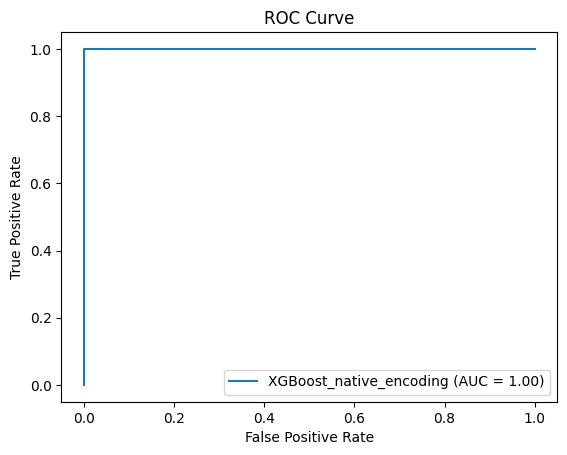

In [27]:
# ROC (Receiver Operating Characteristic) curve and AUC (Area Under the Curve)and:
# common metrics used to evaluate the performance of binary classification models
# The ROC curve plots the true positive rate (sensitivity) against the false positive rate (1-specificity) at various threshold settings 
# AUC measures the entire two-dimensional area underneath the entire ROC curve
# higher ROC is better

from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

def plot_roc(probs, y_test, name):
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc_score = roc_auc_score(y_test, probs)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    
    return auc_score


# plot ROC curves for all models and print AUC scores
models = {
    # "Logistic Regression": logreg_pipe.predict_proba(X_test)[:, 1],
    # "Random Forest": rf_model.predict_proba(X_test)[:, 1],
    # "XGBoost_onehot_encoding": xgb_model_2.predict_proba(X_test_encoded)[:, 1],
    "XGBoost_native_encoding": xgb_model.predict_proba(X_test)[:, 1] 
    # "SVM": svm.predict_proba(X_test)[:, 1],
    # "Neural Network": model.predict(X_test).ravel()  # `.ravel()` is used to flatten the array
}

for name, probs in models.items():
    auc_score = plot_roc(probs, y_test, name)
    print(f"AUC for {name}: {auc_score:.2f}")

plt.show()

In [28]:
# from sklearn.metrics import roc_auc_score

# def compute_auc_by_group(model, X, y, group_column, is_nn=False):
#     groups = X[group_column].unique()
#     auc_scores = {}
    
#     for group in groups:
#         # filter data for the specific group
#         X_group = X[X[group_column] == group]
#         y_group = y[X[group_column] == group]
        
#         # get prediction probabilities
#         if is_nn:  # Check if model is a neural network
#             probs = model.predict(X_group).ravel()
#         else:
#             probs = model.predict_proba(X_group)[:, 1]
        
#         # calculate AUC only if both classes are present in y_group
#         if len(y_group.unique()) > 1:
#             auc_scores[group] = roc_auc_score(y_group, probs)
#         else:
#             auc_scores[group] = "Undefined (only one class present)"
    
#     return auc_scores

# def compute_disparity(model, X, y, group_column, is_nn=False):
#     # compute AUC for each group
#     auc_scores = compute_auc_by_group(model, X, y, group_column, is_nn)
    
#     # filter out groups where AUC is "Undefined"
#     valid_auc_scores = [value for value in auc_scores.values() if value != "Undefined (only one class present)"]
    
#     # calculate disparity
#     if valid_auc_scores:
#         disparity = max(valid_auc_scores) - min(valid_auc_scores)
#     else:
#         disparity = "Undefined (insufficient class diversity)"
    
#     return disparity

# # dictionary to store disparities for each model
# disparities = {}

# # List of models
# models = {
#     # "Logistic Regression": logreg_pipe,
#     # "Random Forest": rf_pipe,
#     "XGBoost": xgb_pipe
#     # "SVM": svm, 
#     # "Neural Network": model
# }

# # # Indicate which models are neural networks
# # nn_models = ["Neural Network"]

# # # Calculate disparity for each model based on race and sex
# for name, model in models.items():
#     is_nn = name in nn_models
#     race_disparity = compute_disparity(model, X_train, y_train, 'race_cd', is_nn)
#     sex_disparity = compute_disparity(model, X_train, y_train, 'sex_cd', is_nn)
    
#     disparities[name] = {"race": race_disparity, "sex": sex_disparity}
#     print(f"Model: {name}")
#     print(f"Observed disparity based on race: {race_disparity}")
#     print(f"Observed disparity based on sex: {sex_disparity}")
#     print("------")


# --------------------------------------------------------------------------------------------

# holdout_target_data

In [29]:
# Load target holdout data
target_holdout_data = pd.read_csv('target_holdout.csv')

# convert date column to datetime objects and set a common timezone (UTC)
target_holdout_data['therapy_start_date'] = pd.to_datetime(target_holdout_data['therapy_start_date']).dt.tz_localize(None)

# holdout_rxclaims_data

In [30]:
# load rxclaims holdout data
rxclaims_holdout_data = pd.read_csv('rxclms_holdout.csv')

# merge therapy start date info from target data to rxclaims holdout data
m_rxclaims_holdout = pd.merge(rxclaims_holdout_data, target_holdout_data[['therapy_id', 'therapy_start_date']], on='therapy_id', how='left')

# convert 'service_date' to datetime and convert to the timezone of 'therapy_start_date'
m_rxclaims_holdout['service_date'] = pd.to_datetime(m_rxclaims_holdout['service_date']).dt.tz_localize(None)

# create a new column 'therapy_status' based on conditions
m_rxclaims_holdout['rx_status'] = 'during_therapy'  # default to during_therapy
m_rxclaims_holdout.loc[m_rxclaims_holdout['service_date'] < m_rxclaims_holdout['therapy_start_date'], 'rx_status'] = 'before_therapy'

relevant_columns = [
    'therapy_id', 'rx_status', 'rx_cost', 'ddi_ind', 'anticoag_ind', 'diarrhea_treat_ind', 
    'nausea_treat_ind', 'seizure_treat_ind']

# drop all other columns
columns_to_drop = [col for col in m_rxclaims_holdout.columns if col not in relevant_columns]
m_rxclaims_holdout = m_rxclaims_holdout.drop(columns=columns_to_drop)

# pivot to have separate columns for before, during, and after therapy
pivot_rxclaims_holdout = m_rxclaims_holdout.pivot_table(index='therapy_id',
                                                      columns='rx_status',
                                                      values=['rx_cost', 'ddi_ind', 'anticoag_ind', 'diarrhea_treat_ind', 
                                                              'nausea_treat_ind', 'seizure_treat_ind'],
                                                      aggfunc='sum',
                                                      fill_value=0)

# flatten the multiIndex columns and reset the index
pivot_rxclaims_holdout.columns = ['_'.join(col) for col in pivot_rxclaims_holdout.columns]
pivot_rxclaims_holdout.reset_index(inplace=True)

# create a new column for the sum of 'before' indicators
pivot_rxclaims_holdout['before_indicators_sum'] = pivot_rxclaims_holdout['anticoag_ind_before_therapy'] + pivot_rxclaims_holdout['ddi_ind_before_therapy'] + pivot_rxclaims_holdout['diarrhea_treat_ind_before_therapy'] + pivot_rxclaims_holdout['nausea_treat_ind_before_therapy'] + pivot_rxclaims_holdout['seizure_treat_ind_before_therapy']

# create a new column for the sum of 'during' indicators
pivot_rxclaims_holdout['during_indicators_sum'] = pivot_rxclaims_holdout['anticoag_ind_during_therapy'] + pivot_rxclaims_holdout['ddi_ind_during_therapy'] + pivot_rxclaims_holdout['diarrhea_treat_ind_during_therapy'] + pivot_rxclaims_holdout['nausea_treat_ind_during_therapy'] + pivot_rxclaims_holdout['seizure_treat_ind_during_therapy']

# create a new column 'side_effects_during_therapy_flag'
pivot_rxclaims_holdout['first_side_effects_during_therapy_flag'] = (pivot_rxclaims_holdout['before_indicators_sum'] == 0) & (pivot_rxclaims_holdout['during_indicators_sum'] >= 1)

# convert boolean values to 1 or 0
pivot_rxclaims_holdout['first_side_effects_during_therapy_flag'] = pivot_rxclaims_holdout['first_side_effects_during_therapy_flag'].astype(int)

pivot_rxclaims_holdout.head()

,therapy_id,anticoag_ind_before_therapy,anticoag_ind_during_therapy,ddi_ind_before_therapy,ddi_ind_during_therapy,diarrhea_treat_ind_before_therapy,diarrhea_treat_ind_during_therapy,nausea_treat_ind_before_therapy,nausea_treat_ind_during_therapy,rx_cost_before_therapy,rx_cost_during_therapy,seizure_treat_ind_before_therapy,seizure_treat_ind_during_therapy,before_indicators_sum,during_indicators_sum,first_side_effects_during_therapy_flag
0,1000261259-TAGRISSO-1,0,0,0,0,0,0,0,0,3313.22,16273.06,0,0,0,0,0
1,1001691228-TAGRISSO-1,0,0,0,0,0,0,0,0,2.11,0.00,0,0,0,0,0
2,1002060555-TAGRISSO-1,0,0,0,0,0,0,0,0,489.18,16226.59,0,0,0,0,0
3,1003935675-TAGRISSO-1,0,0,0,0,0,0,0,0,195.97,16058.57,0,0,0,0,0
4,1004837018-TAGRISSO-1,0,0,0,0,0,0,2,1,1426.35,5528.92,0,0,2,1,0


# holdout_medclaims_data

In [31]:
# medclaims holdout data
medclaims_holdout_data = pd.read_csv('medclms_holdout.csv')

# merge on 'therapy_id'
m_medclaims_holdout = pd.merge(medclaims_holdout_data, target_holdout_data[['therapy_id', 'therapy_start_date']], on='therapy_id', how='left')

# convert 'service_date' to datetime and convert to the timezone of 'therapy_start_date'
m_medclaims_holdout['visit_date'] = pd.to_datetime(m_medclaims_holdout['visit_date']).dt.tz_localize(None)

# create a new column 'therapy_status' based on conditions
m_medclaims_holdout['diag_status'] = 'during_therapy'  # default to during_therapy
m_medclaims_holdout.loc[m_medclaims_holdout['visit_date'] < m_medclaims_holdout['therapy_start_date'], 'diag_status'] = 'before_therapy'

relevant_columns_meds = [
    'therapy_id', 'clm_unique_key', 'ade_diagnosis', 'seizure_diagnosis', 'pain_diagnosis', 'fatigue_diagnosis', 'nausea_diagnosis', 
    'hyperglycemia_diagnosis', 'constipation_diagnosis', 'diarrhea_diagnosis', 'diag_status']

# dropping all other columns
columns_to_drop_meds = [col for col in m_medclaims_holdout.columns if col not in relevant_columns_meds]
m_medclaims_holdout = m_medclaims_holdout.drop(columns=columns_to_drop_meds)

# remove duplicate rows based on both 'therapy_id' and 'clm_unique_key' columns
m_medclaims_holdout = m_medclaims_holdout.drop_duplicates(subset=['therapy_id', 'clm_unique_key'])

m_medclaims_holdout.reset_index(drop=True, inplace=True)

# pivot to have separate columns for before and during
pivot_medclaims_holdout = m_medclaims_holdout.pivot_table(index='therapy_id',
                                        columns='diag_status',
                                        values=['ade_diagnosis', 'seizure_diagnosis', 'pain_diagnosis', 'fatigue_diagnosis', 
                                                'nausea_diagnosis', 'hyperglycemia_diagnosis','constipation_diagnosis', 'diarrhea_diagnosis'],
                                        aggfunc='sum',
                                        fill_value=0)

# flatten the multiIndex columns and reset the index
pivot_medclaims_holdout.columns = ['_'.join(col) for col in pivot_medclaims_holdout.columns]
pivot_medclaims_holdout.reset_index(inplace=True)


# create new columns for the sums of 'before' and 'during' diagnosis indicators
pivot_medclaims_holdout['before_diagnosis_sum'] = (
    pivot_medclaims_holdout['constipation_diagnosis_before_therapy'] +
    pivot_medclaims_holdout['diarrhea_diagnosis_before_therapy'] +
    pivot_medclaims_holdout['fatigue_diagnosis_before_therapy'] +
    pivot_medclaims_holdout['hyperglycemia_diagnosis_before_therapy'] +
    pivot_medclaims_holdout['nausea_diagnosis_before_therapy'] +
    pivot_medclaims_holdout['pain_diagnosis_before_therapy'] +
    pivot_medclaims_holdout['seizure_diagnosis_before_therapy']
)

pivot_medclaims_holdout['during_diagnosis_sum'] = (
    pivot_medclaims_holdout['constipation_diagnosis_during_therapy'] +
    pivot_medclaims_holdout['diarrhea_diagnosis_during_therapy'] +
    pivot_medclaims_holdout['fatigue_diagnosis_during_therapy'] +
    pivot_medclaims_holdout['hyperglycemia_diagnosis_during_therapy'] +
    pivot_medclaims_holdout['nausea_diagnosis_during_therapy'] +
    pivot_medclaims_holdout['pain_diagnosis_during_therapy'] +
    pivot_medclaims_holdout['seizure_diagnosis_during_therapy']
)

# create a new column 'side_effects_during_therapy_flag'
pivot_medclaims_holdout['first_diagnosis_during_therapy_flag'] = (pivot_medclaims_holdout['before_diagnosis_sum'] == 0) & (pivot_medclaims_holdout['during_diagnosis_sum'] >= 1)

# convert boolean values to 1 or 0
pivot_medclaims_holdout['first_diagnosis_during_therapy_flag'] = pivot_medclaims_holdout['first_diagnosis_during_therapy_flag'].astype(int)

pivot_medclaims_holdout.head()

,therapy_id,ade_diagnosis_before_therapy,ade_diagnosis_during_therapy,constipation_diagnosis_before_therapy,constipation_diagnosis_during_therapy,diarrhea_diagnosis_before_therapy,diarrhea_diagnosis_during_therapy,fatigue_diagnosis_before_therapy,fatigue_diagnosis_during_therapy,hyperglycemia_diagnosis_before_therapy,hyperglycemia_diagnosis_during_therapy,nausea_diagnosis_before_therapy,nausea_diagnosis_during_therapy,pain_diagnosis_before_therapy,pain_diagnosis_during_therapy,seizure_diagnosis_before_therapy,seizure_diagnosis_during_therapy,before_diagnosis_sum,during_diagnosis_sum,first_diagnosis_during_therapy_flag
0,1000261259-TAGRISSO-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1001691228-TAGRISSO-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1002060555-TAGRISSO-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1003935675-TAGRISSO-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1004837018-TAGRISSO-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# merging_all_holdout_datasets

In [32]:
# merging all datasets
pre_merged_data_holdout = pd.merge(pivot_rxclaims_holdout, target_holdout_data, on='therapy_id', how='outer')  
merged_data_holdout = pd.merge(pre_merged_data_holdout, pivot_medclaims_holdout, on='therapy_id', how='outer') 

# merged_data_holdout.to_csv("test.csv", index=False)


# # count the number of 'F' and 'M' values in the available data
# num_females = (merged_data_holdout['sex_cd'] == 1).sum()
# num_males = (merged_data_holdout['sex_cd'] == 0).sum()

# # calculate the ratio of 'F' and 'M' in the available data
# ratio_females = num_females / (num_females + num_males)
# ratio_males = num_males / (num_females + num_males)

# # replace missing values with 1 or 0 based on the calculated distribution
# missing_sex_cd_indices = merged_data_holdout['sex_cd'].isnull()
# missing_sex_cd_values = np.random.choice([1, 0], size=missing_sex_cd_indices.sum(), p=[ratio_females, ratio_males])

# # update the 'sex_cd' column with the assigned values for missing rows
# merged_data_holdout.loc[missing_sex_cd_indices, 'sex_cd'] = missing_sex_cd_values

# # replacing missing values in 'est_age' with median
# median_age = merged_data_holdout['est_age'].median()
# merged_data_holdout['est_age'].fillna(median_age, inplace=True)

# # replace nan with 0
# merged_data_holdout.fillna(0, inplace=True)

# merged_data_holdout.to_csv("test.csv", index=False)

# # Columns to scale
# columns_to_scale = ['anticoag_ind_before_therapy', 'anticoag_ind_during_therapy', 'ddi_ind_before_therapy', 'ddi_ind_during_therapy',
#                     'diarrhea_treat_ind_before_therapy', 'diarrhea_treat_ind_during_therapy', 'nausea_treat_ind_before_therapy',
#                     'nausea_treat_ind_during_therapy', 'rx_cost_before_therapy', 'rx_cost_during_therapy','seizure_treat_ind_before_therapy',
#                     'seizure_treat_ind_during_therapy','before_indicators_sum', 'during_indicators_sum', 'est_age',
#                     'ade_diagnosis_before_therapy', 'ade_diagnosis_during_therapy','constipation_diagnosis_before_therapy', 
#                     'constipation_diagnosis_during_therapy', 'diarrhea_diagnosis_before_therapy', 'diarrhea_diagnosis_during_therapy', 
#                     'fatigue_diagnosis_before_therapy', 'fatigue_diagnosis_during_therapy', 'hyperglycemia_diagnosis_before_therapy', 
#                     'hyperglycemia_diagnosis_during_therapy','nausea_diagnosis_before_therapy', 'nausea_diagnosis_during_therapy', 
#                     'pain_diagnosis_before_therapy','pain_diagnosis_during_therapy', 'seizure_diagnosis_before_therapy', 
#                     'seizure_diagnosis_during_therapy', 'before_diagnosis_sum', 'during_diagnosis_sum']

# # Create a StandardScaler instance
# scaler = StandardScaler()



# # Save the updated DataFrame to a CSV file
# merged_data_holdout.to_csv("holdout_target_rxclaims_medclaims_merged.csv",  index=False)
# merged_data_holdout.tail()

In [33]:
# encode 'F' as 1 and 'M' as 0
merged_data_holdout['sex_cd'] = merged_data_holdout['sex_cd'].replace({'F': 1, 'M': 0})

# keeping just predictors
X_holdout = merged_data_holdout.drop(columns=['therapy_id', 'id', 'therapy_start_date','ade_diagnosis_before_therapy',
                                              'ade_diagnosis_during_therapy'])

# converting categorical preditors' column type
columns_to_convert = ["first_side_effects_during_therapy_flag", "race_cd", "sex_cd", "cms_disabled_ind", 
                      "cms_low_income_ind","first_diagnosis_during_therapy_flag"]
X_holdout[columns_to_convert] = X_holdout[columns_to_convert].astype("category")


# Scale the specified columns
X_holdout[columns_to_scale] = scaler.transform(X_holdout[columns_to_scale])


# # Fit and transform the DataFrame
# X_holdout = encoder.transform(X_holdout)


# XGBoost Predictions
merged_data_holdout['xgb_prob'] = xgb_model.predict_proba(X_holdout)[:, 1]

# # Logistic Regression Predictions
# merged_data_holdout['logreg_prob'] = logreg_pipe.predict_proba(X_holdout)[:, 1]

# # Random Forest Predictions
# merged_data_holdout['rf_prob'] = rf_pipe.predict_proba(X_holdout)[:, 1]

# # SVM Predictions
# merged_data_holdout['svm_prob'] = svm.predict_proba(X_holdout)[:, 1]

# # Neural Network Predictions
# merged_data_holdout['nn_prob'] = model.predict(X_holdout).flatten()


X_holdout.to_csv("holdout_predictors.csv",  index=False)
merged_data_holdout.to_csv("holdout_results.csv")

C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:463: FutureWarning: is_sparse i

In [34]:
# generating output file

lr = 'logreg_prob'
rf = 'rf_prob'
xgb = 'xgb_prob' 
svm = 'svm_prob'
nn = 'nn_prob'

merged_data_holdout['SCORE'] = merged_data_holdout[xgb]

# sorting by score
merged_data_holdout = merged_data_holdout.sort_values(by="SCORE", ascending=False)

# add the "rank" column
merged_data_holdout['RANK'] = range(1, len(merged_data_holdout) + 1)

# rename "id" to "ID"
merged_data_holdout = merged_data_holdout.rename(columns={'id': 'ID'})

output_data = merged_data_holdout[['ID', 'SCORE', 'RANK']]

# Save the DataFrame to a CSV file
output_data.to_csv("2023CaseCompetition_Oliver_Hewett_20230930.csv", index=False)

# fin